# Proyectar y graficar características de audios
## Adrián Arnaiz
Haremos un estudio sobre la reducción de dimensionalidad de los diferentes conjuntos de atributos que hemos obtenido con la librería DisVoice. Haremos la reducción a 2 componentes con los algoritmos PCA, TSNE, LDA y Kernel PCA.

<a id="index"></a>
## Índice de contenido

0. [Funciones generales](#func)
1. [PCA](#pca)
2. [T-SNE](#tsne)
3. [LDA](#lda)
4. [Kernel PCA (linear)](#kpca)
5. [Conclusion](#conc)
    

## Funciones generales <a id="func"></a><a href="#index"><i class="fa fa-list-alt" aria-hidden="true"></i></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import manifold
from sklearn.decomposition import PCA, KernelPCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import os

#### Definimos función que pinta el gráfico.
Recibe un conjunto de datos de 2 atributos: los datos a dibujar (es decir, nuestros datos ya transformados a 2 dimensiones) y el título y los muestra.

In [2]:
def draw_graphic(X_trans, y, title=None):
    assert X_trans.shape[1] == 2, 'La longitud es: '+str(X_trans.shape[1]) +', y deberia ser 2'
    #dibujamos
    plt.figure()
    colors = ['navy','darkorange']
    target_names = ['HC', 'PD']

    for color, i, target_name in zip(colors, [0, 1], target_names):
        plt.scatter(X_trans[y == i, 0], X_trans[y == i, 1], color=color, alpha=.5,
                    label=target_name)
    plt.legend(loc='best', shadow=False, scatterpoints=1)
    if title is not None:
        plt.title(title)
    plt.show()

#### Definimos función que realizará el análisis deseado
Recibe la ruta del conjunto de datos del que hacer la proyección, el algoritmo con el que realizar la proyección y el título del modelo para insertar en el gráfico.

In [3]:
def analysis(ruta, modelo, title):
    '''
    Dibuja la proyección PCA de dos componentes de los datos tipo numpy pasados como ruta.
    '''
    #Obtenemos datos
    data = np.load(ruta)
    if not np.isnan(data).any():
        X = data[:,:-1] #todos los atributos
        y = data[:,-1]  # todos los targets

        #Creamos pca y reducimos la dimensionalidad
        model = modelo
        X_r = model.fit_transform(X)

        #dibujamos
        draw_graphic(X_r, y, title+'- '+ruta[27:-4]+' - de '+str(data[:,:-1].shape[1])+' atributos a 2')
        return X_r
    else:
        print('No se puede analizar: '+ ruta[27:-4] +' contienen NAN')

## PCA de dos componentes principales <a id="pca"></a><a href="#index"><i class="fa fa-list-alt" aria-hidden="true"></i></a>

**Graficamos todos los subsets de características con el modelo PCA**

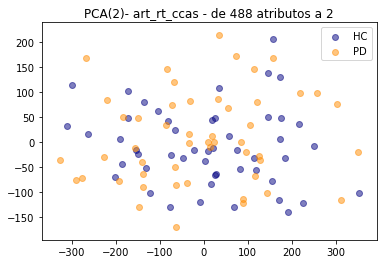

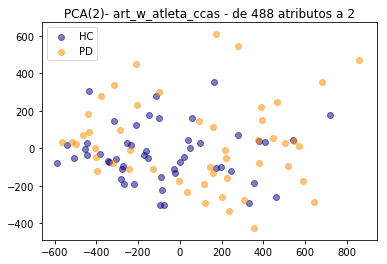

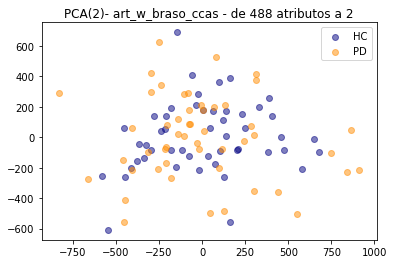

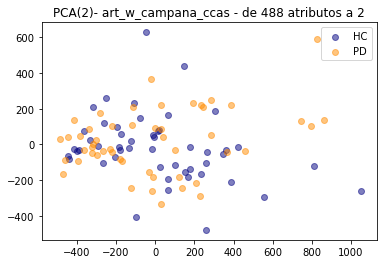

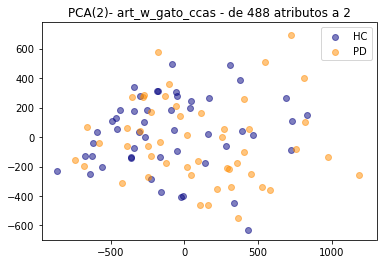

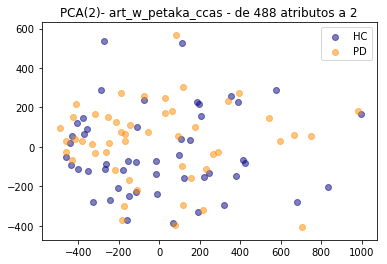

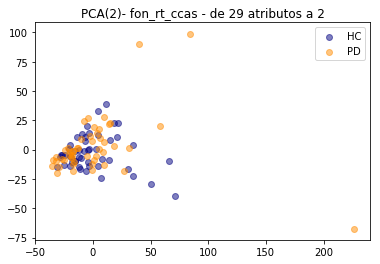

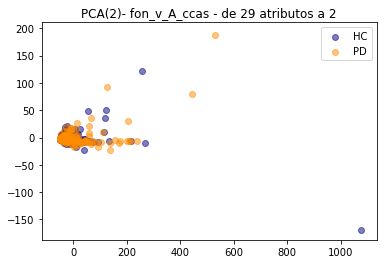

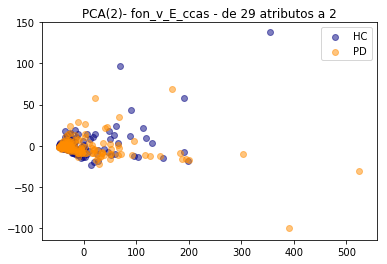

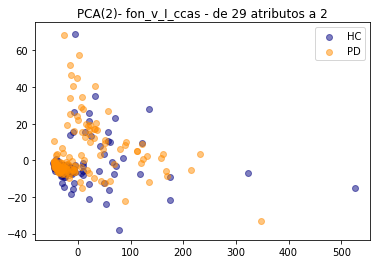

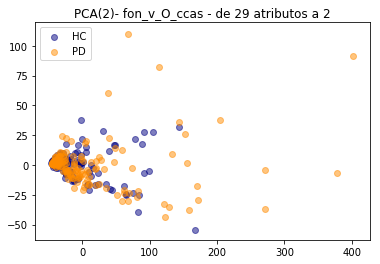

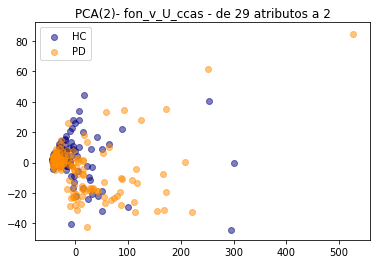

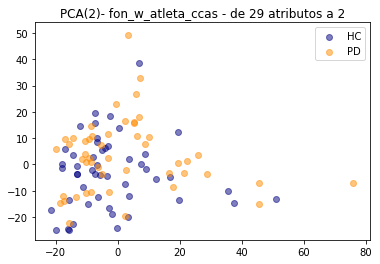

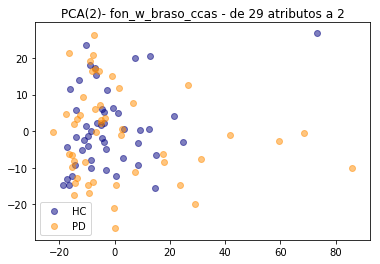

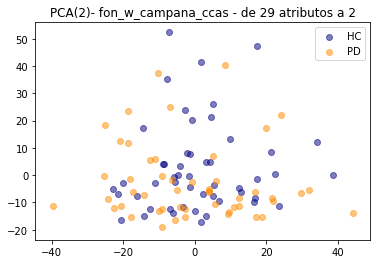

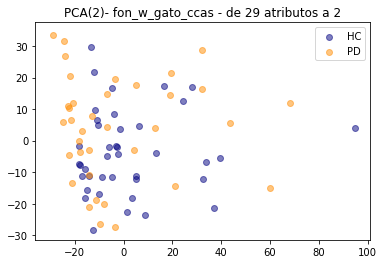

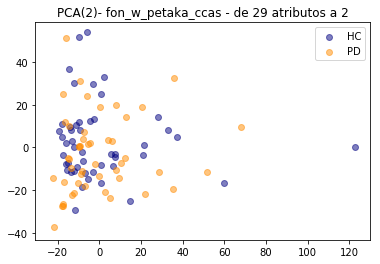

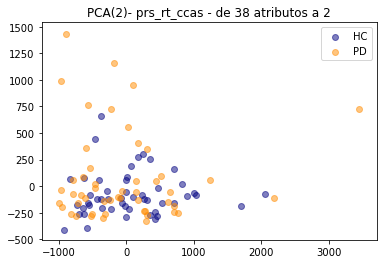

In [4]:
sets_ccas = [d for d in os.listdir('CaracteristicasExtraidas') if d.endswith('.npy')]
ruta_ccas = './CaracteristicasExtraidas/'
for ccas in sets_ccas:
    pca = PCA(n_components=2)
    xxrr = analysis(ruta_ccas+ccas, pca, 'PCA(2)')

-----------------
## TSNE <a id="tsne"></a><a href="#index"><i class="fa fa-list-alt" aria-hidden="true"></i></a>
**t-Distributed Stochastic Neighbor Embedding**

**Graficamos todos los subsets de características con t-SNE**

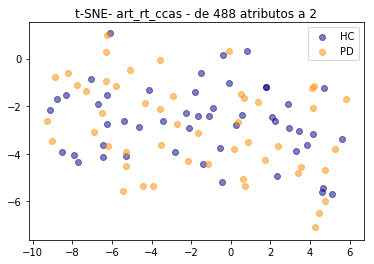

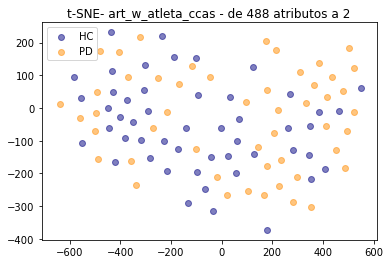

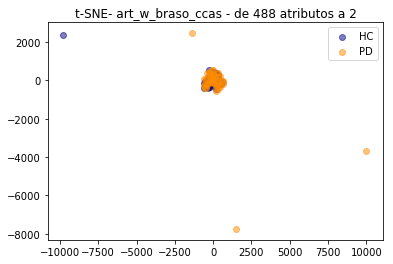

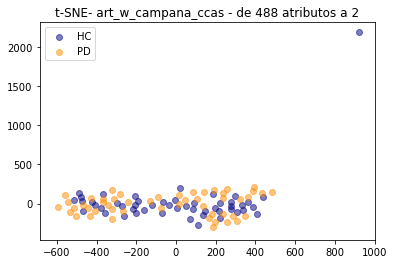

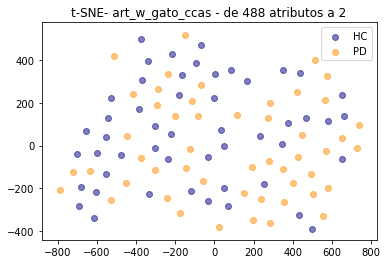

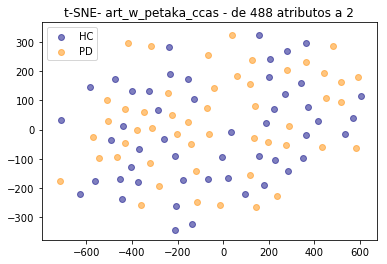

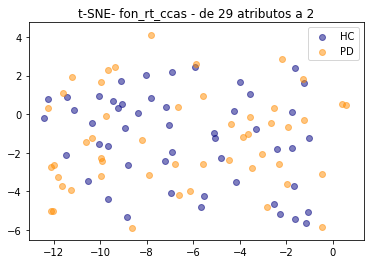

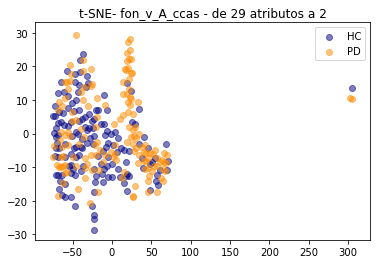

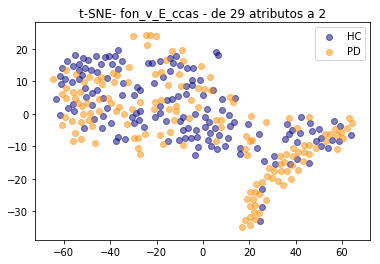

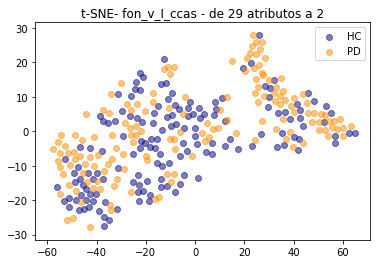

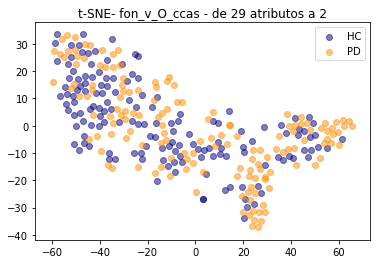

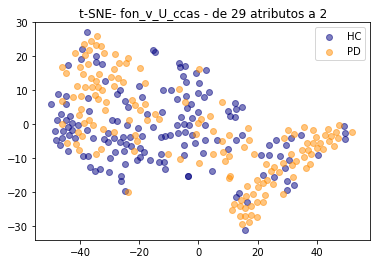

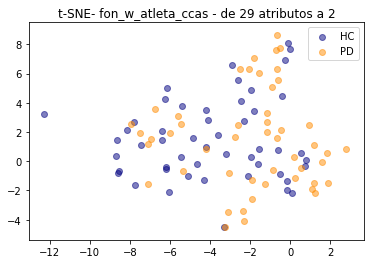

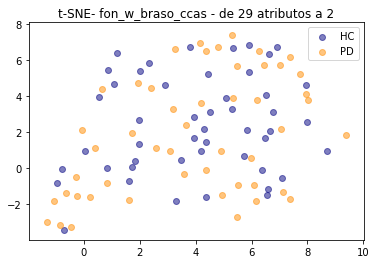

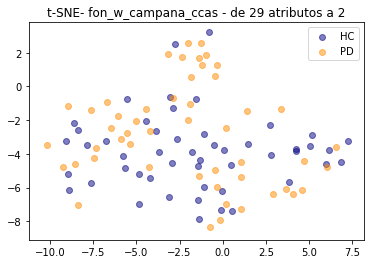

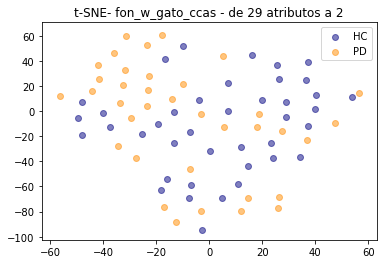

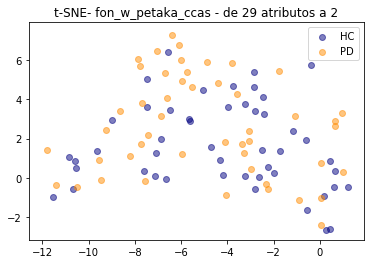

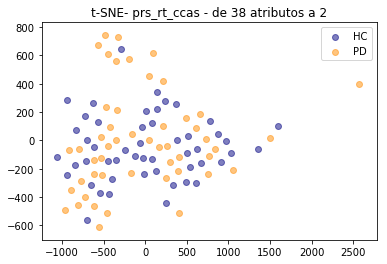

In [5]:
for ccas in sets_ccas:
    tsne = manifold.TSNE(n_components=2, init='pca', random_state=0)
    xxrr = analysis(ruta_ccas+ccas, tsne, 't-SNE')

-----------------
## Linear Discriminant Analysis (LDA) <a id="lda"></a><a href="#index"><i class="fa fa-list-alt" aria-hidden="true"></i></a>
LDA es un algoritmo de reducción de dimensionalidad supervisado. Tiene el inconveniente de que solamente puede devolver como máximo tantas dimensiones como Clases-1 tenemos a predecir. Por lo tanto, es nuestro conjunto de datos solo puede devolver una componente. A la hora de graficar dibujaremos esa proyección de una dimensión sobre la línea horizontal y=0.

En este caso hacemos una función particular ya que debemos añadir artificialmente una dimensión para poderlo graficar en una línea.

In [6]:
def lda_analysis(ruta):
    
    '''
    Dibuja la proyección Linear Discriminant Analysis de los datos tipo numpy pasados como ruta.
    '''
    #Obtenemos datos
    data = np.load(ruta)
    if not np.isnan(data).any():
        X = data[:,:-1]
        y = data[:,-1]

        lda = LinearDiscriminantAnalysis(n_components=2)
        X_r = lda.fit(X, y).transform(X)

        #Nos devuelve solo 1 dimensión: la graficamos en una sola línea horizontal
        X_r = np.append(X_r, np.zeros((X_r.shape[0],1)), axis=1)
        draw_graphic(X_r, y,
                       "LDA - "+ruta[27:-4]+' - de '+str(data[:,:-1].shape[1])+' atributos a 2')
        return X_r
    else:
        print('No se puede analizar: '+ ruta[27:-4] +' contienen NAN')
    

**Graficamos todos los subsets de características con t-SNE**

C:\Users\usuario\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


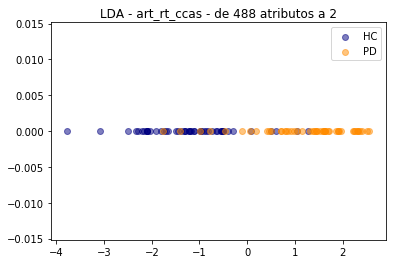

C:\Users\usuario\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


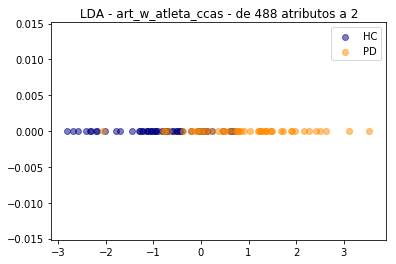

C:\Users\usuario\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


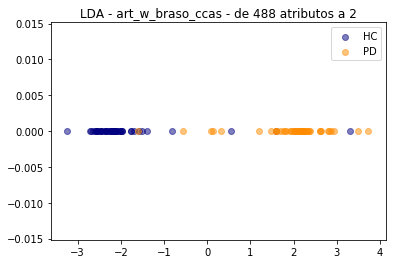

C:\Users\usuario\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


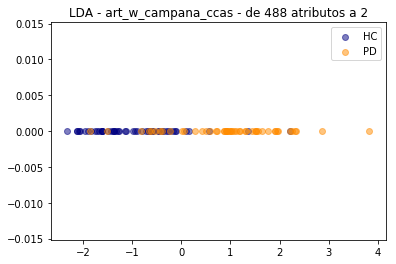

C:\Users\usuario\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


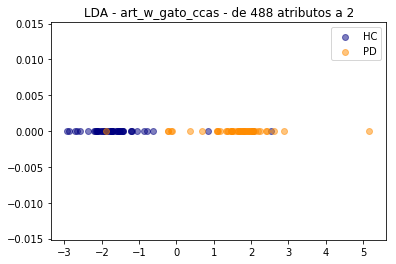

C:\Users\usuario\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


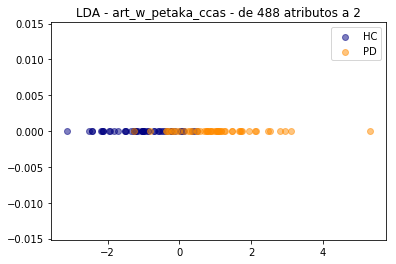

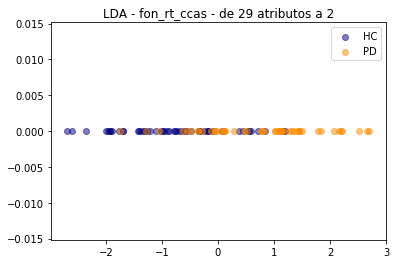

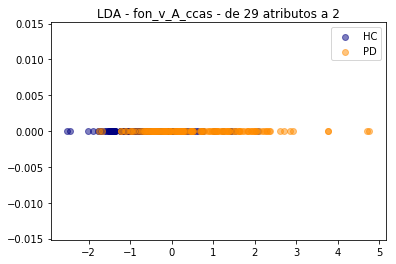

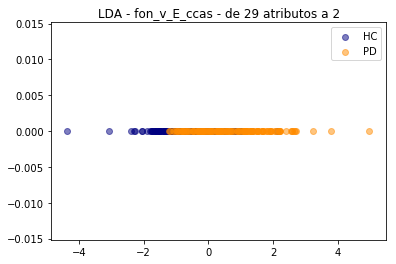

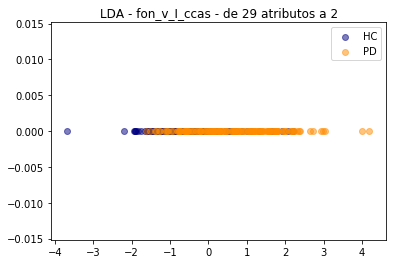

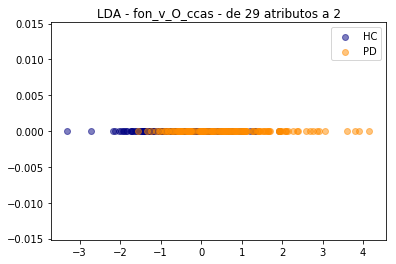

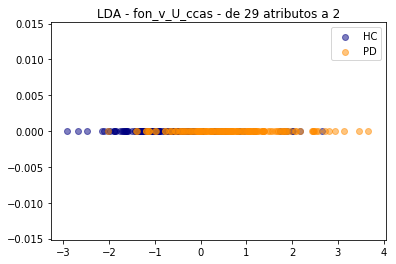

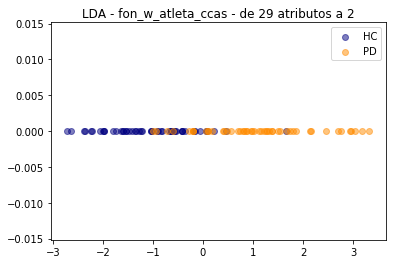

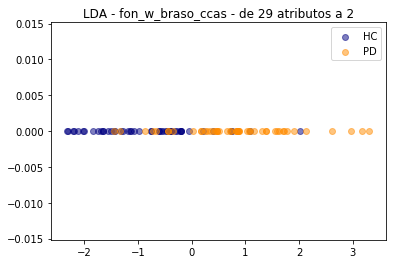

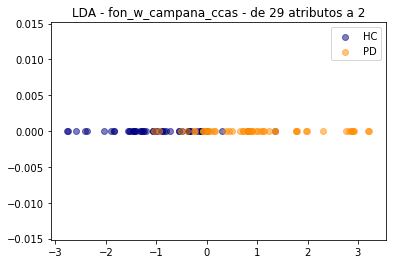

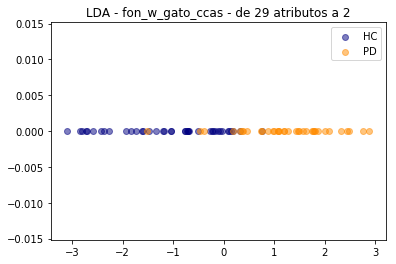

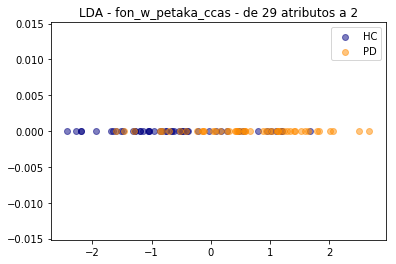

C:\Users\usuario\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


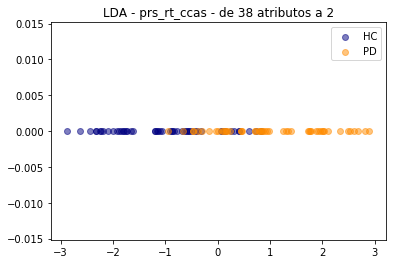

In [7]:
for ccas in sets_ccas:
    xxrr = lda_analysis(ruta_ccas+ccas)

--------------------
## Kernel PCA <a id="kpca"></a><a href="#index"><i class="fa fa-list-alt" aria-hidden="true"></i></a>

**Graficamos todos los subsets de características con t-SNE**

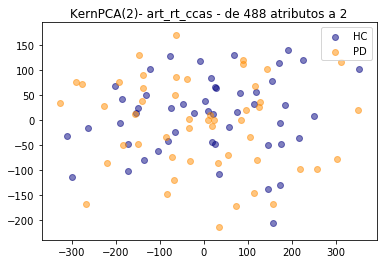

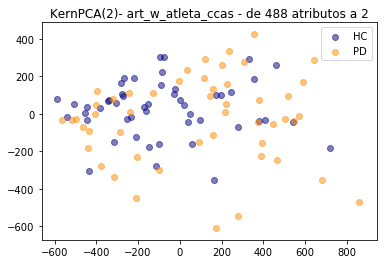

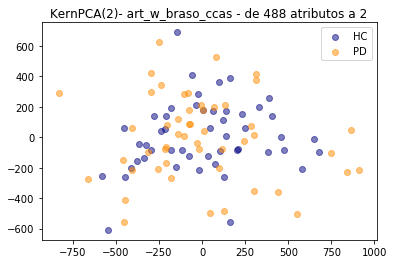

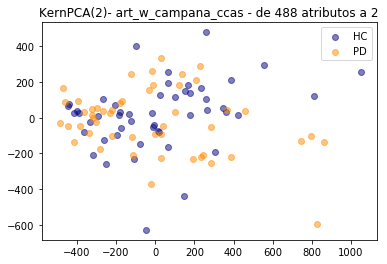

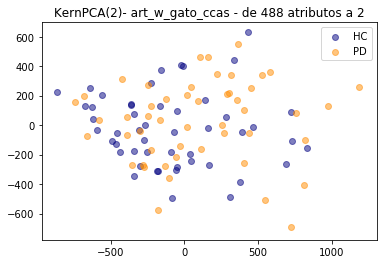

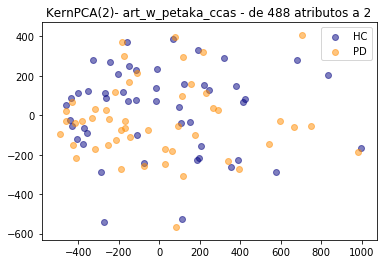

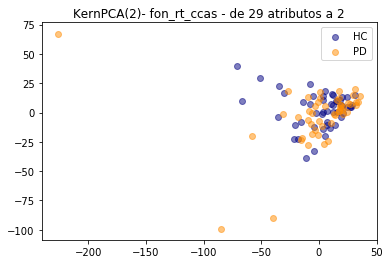

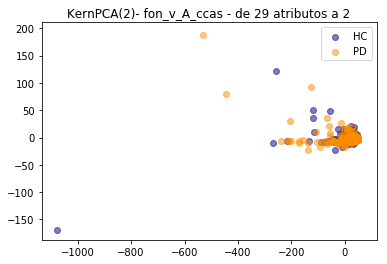

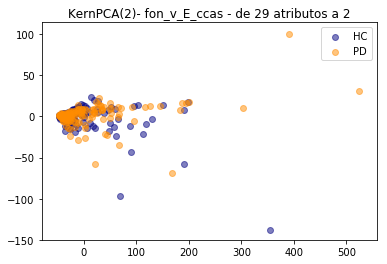

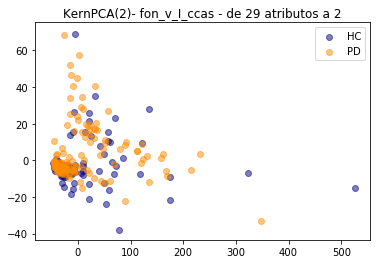

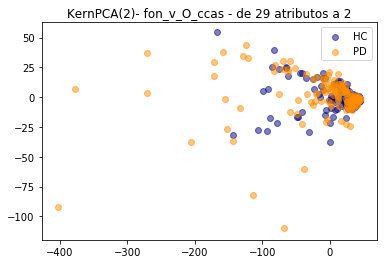

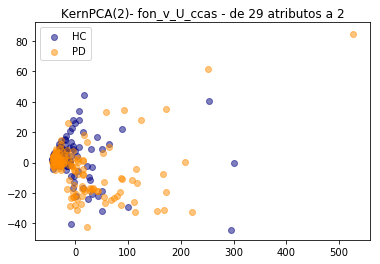

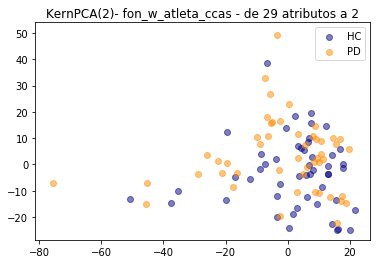

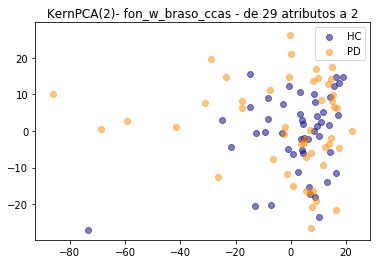

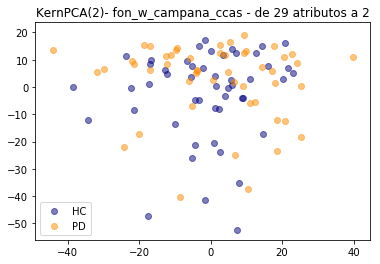

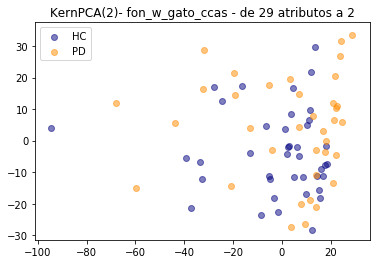

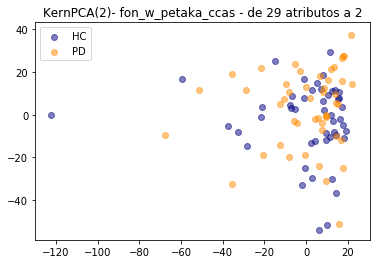

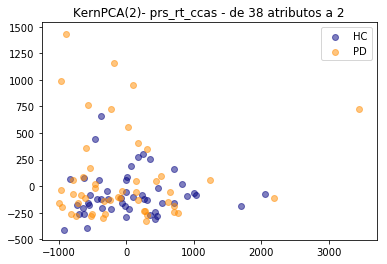

In [8]:
for ccas in sets_ccas:
    kpca = KernelPCA(n_components = 2,  kernel="linear")
    xxrr = analysis(ruta_ccas+ccas, kpca, 'KernPCA(2)')

-------------
## Conclusión <a id="conc"></a><a href="#index"><i class="fa fa-list-alt" aria-hidden="true"></i></a>
No podemos sacar ninguna conclusión el claro, ya que con todos los distintos tipos de modelos aplicados a todos y cada uno de los subsets de características obtenemos poca claridad en la visualización. 

Hay conjuntos de características donde los puntos están acumulados en puntos de más densidad, es decir, están todos más juntos y otros subsets de características donde lo están menos. Pero **en ningún caso obtenemos diferenciación clara entre las intancias de pacientes con PD y pacientes sanos.**